# Sentiment Analysis

### 1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach

### 2. Roberta Pretrained Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

import nltk

In [8]:
df = pd.read_csv('Review.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.shape

(500, 10)

Quick EDA

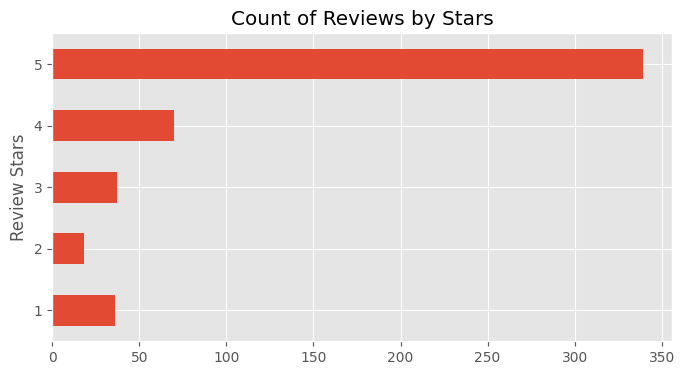

In [10]:
df['Score'].value_counts().sort_index().plot(kind='barh', title='Count of Reviews by Stars', figsize=(8,4))
plt.ylabel('Review Stars')
plt.show()

Basic NLTK

In [11]:
example = df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [12]:
print(nltk.word_tokenize(example))

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

Parts of Speech

In [14]:
#nltk.download('averaged_perceptron_tagger')

In [15]:
parts_of_speech = nltk.pos_tag(tokens)
parts_of_speech[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [16]:
#nltk.download('maxent_ne_chunker')

In [17]:
#nltk.download('words')

In [18]:
entities = nltk.chunk.ne_chunk(parts_of_speech)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER Sentiment Score

We will use NLTK's 'SentimentIntensityAnalyzer' to get the neg/neu/pos scores of the text

This uses a "bag of words" approach:

Stop words are removed and each word is scored and combined to a total score.

Stop words are words that are commonly used in a language but are often considered of little value in terms of meaning. These words are typically filtered out during the preprocessing phase of text data to focus on more meaningful words.

In [19]:
#nltk.download('stopwords')

In [20]:
from nltk.corpus import stopwords
print('No. of Stop Words in English are',len(stopwords.words('english')))
print('Few stop words are',stopwords.words('english')[:10])

No. of Stop Words in English are 179
Few stop words are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Coming back to VADER..

The approach does not account for relationship between the words which in human speech is very important. But it is a good start

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
sia

Example..

In [23]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
sia.polarity_scores('I am fucking depressed')

{'neg': 0.642, 'neu': 0.358, 'pos': 0.0, 'compound': -0.5563}

In [25]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [26]:
# Run the polarity score on entire dataset
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [28]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [29]:
vaders.reset_index()

,index,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [30]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = pd.merge(left=vaders, right=df, how='left')

In [31]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot VADER Results

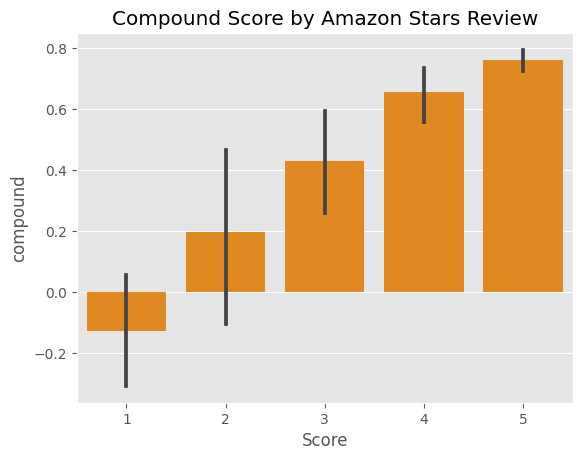

In [32]:
sns.barplot(data=vaders, x='Score', y='compound', color='darkorange')
plt.title('Compound Score by Amazon Stars Review')
plt.show()

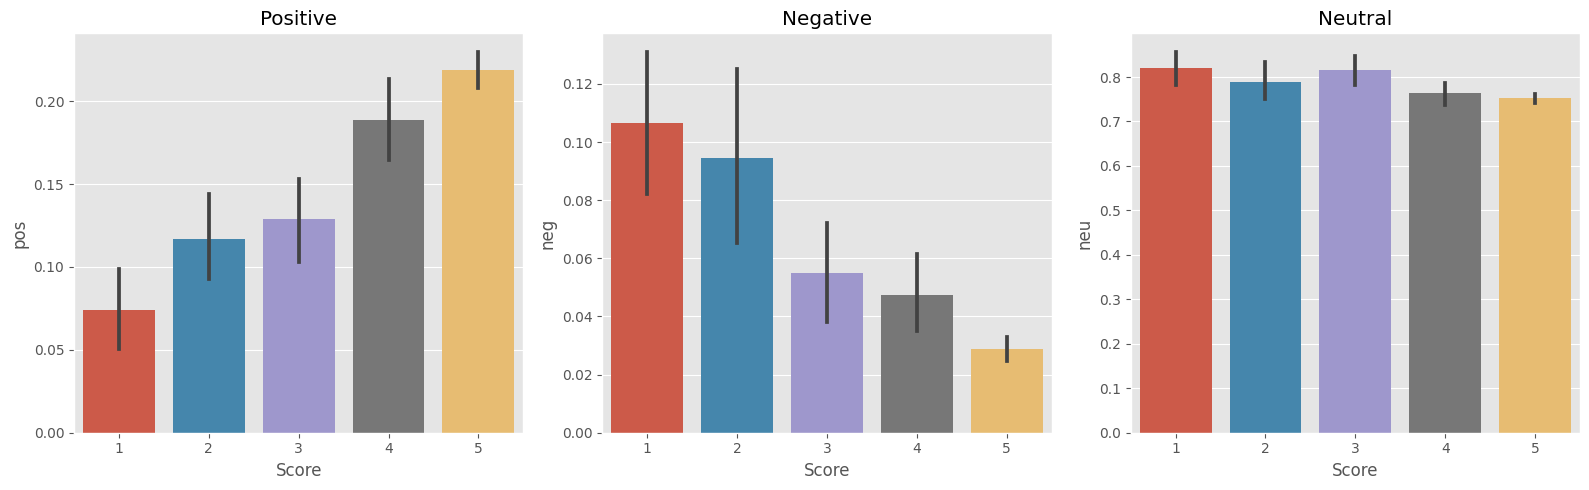

In [33]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0])
sns.barplot(data=vaders, x='Score', y='neg', ax=ax[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Negative')
ax[2].set_title('Neutral')

plt.tight_layout()
plt.show()

## Roberta Pretrained Model

Model trained of a large corpus of data.

Transformer model accounts for the words but also the context related to other words.

In [34]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
# VADER results on example
print(example)
print(sia.polarity_scores(example))

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [37]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [38]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [39]:
output[0][0]

tensor([ 3.1436, -0.7107, -2.6559], grad_fn=<SelectBackward0>)

In [40]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.97635514, 0.02068747, 0.00295737], dtype=float32)

In [41]:
scores_dict = {'roberta_neg':scores[0], 'roberta_neu':scores[1], 'roberta_pos':scores[2]}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573706}


Applying this to the dataset

In [42]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'roberta_neg':scores[0], 'roberta_neu':scores[1], 'roberta_pos':scores[2]}
    return scores_dict

In [43]:
roberta_df = df.copy()

In [44]:
# Introducing the columns in dataset
roberta_df['roberta_neg'] = roberta_df['roberta_neu'] = roberta_df['roberta_pos']= 0.5

In [45]:
scores_dict = {}
for i in range(len(df)):
    try:
        scores_dict[i] = polarity_scores_roberta(roberta_df['Text'][i])
    except RuntimeError:
        print(f'Broke for id {i}')
#scores_dict

Broke for id 82
Broke for id 186


In [46]:
for i in tqdm(range(len(roberta_df))):
    try:
        roberta_df['roberta_neg'][i] = list(polarity_scores_roberta(roberta_df['Text'][i]).values())[0]
        roberta_df['roberta_neu'][i] = list(polarity_scores_roberta(roberta_df['Text'][i]).values())[1]
        roberta_df['roberta_pos'][i] = list(polarity_scores_roberta(roberta_df['Text'][i]).values())[2]
    except RuntimeError:
        print(f'Broke for id {i}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 82
Broke for id 186


In [47]:
roberta_df.tail(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,roberta_neg,roberta_neu,roberta_pos
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.006427,0.074537,0.919036
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.865614,0.119366,0.015020
499,500,B000G6RYNE,A83YQC1XOU4CS,J. Baker,0,0,5,1183420800,The best I've had,I don't write very many reviews but I have to ...,0.002440,0.011327,0.986233


## Combining Roberta and Vaders dataframes for comparisions

In [48]:
combined_df = vaders.copy()

In [49]:
combined_df.rename(columns={'neg':'vader_neg','neu':'vader_neu','pos':'vader_pos', 'compound':'vader_compound'}, inplace=True)

In [50]:
combined_df['roberta_neg'] = roberta_df['roberta_neg']
combined_df['roberta_neu'] = roberta_df['roberta_neu']
combined_df['roberta_pos'] = roberta_df['roberta_pos']

In [51]:
combined_df = combined_df[['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']]

In [52]:
combined_df.head(3)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


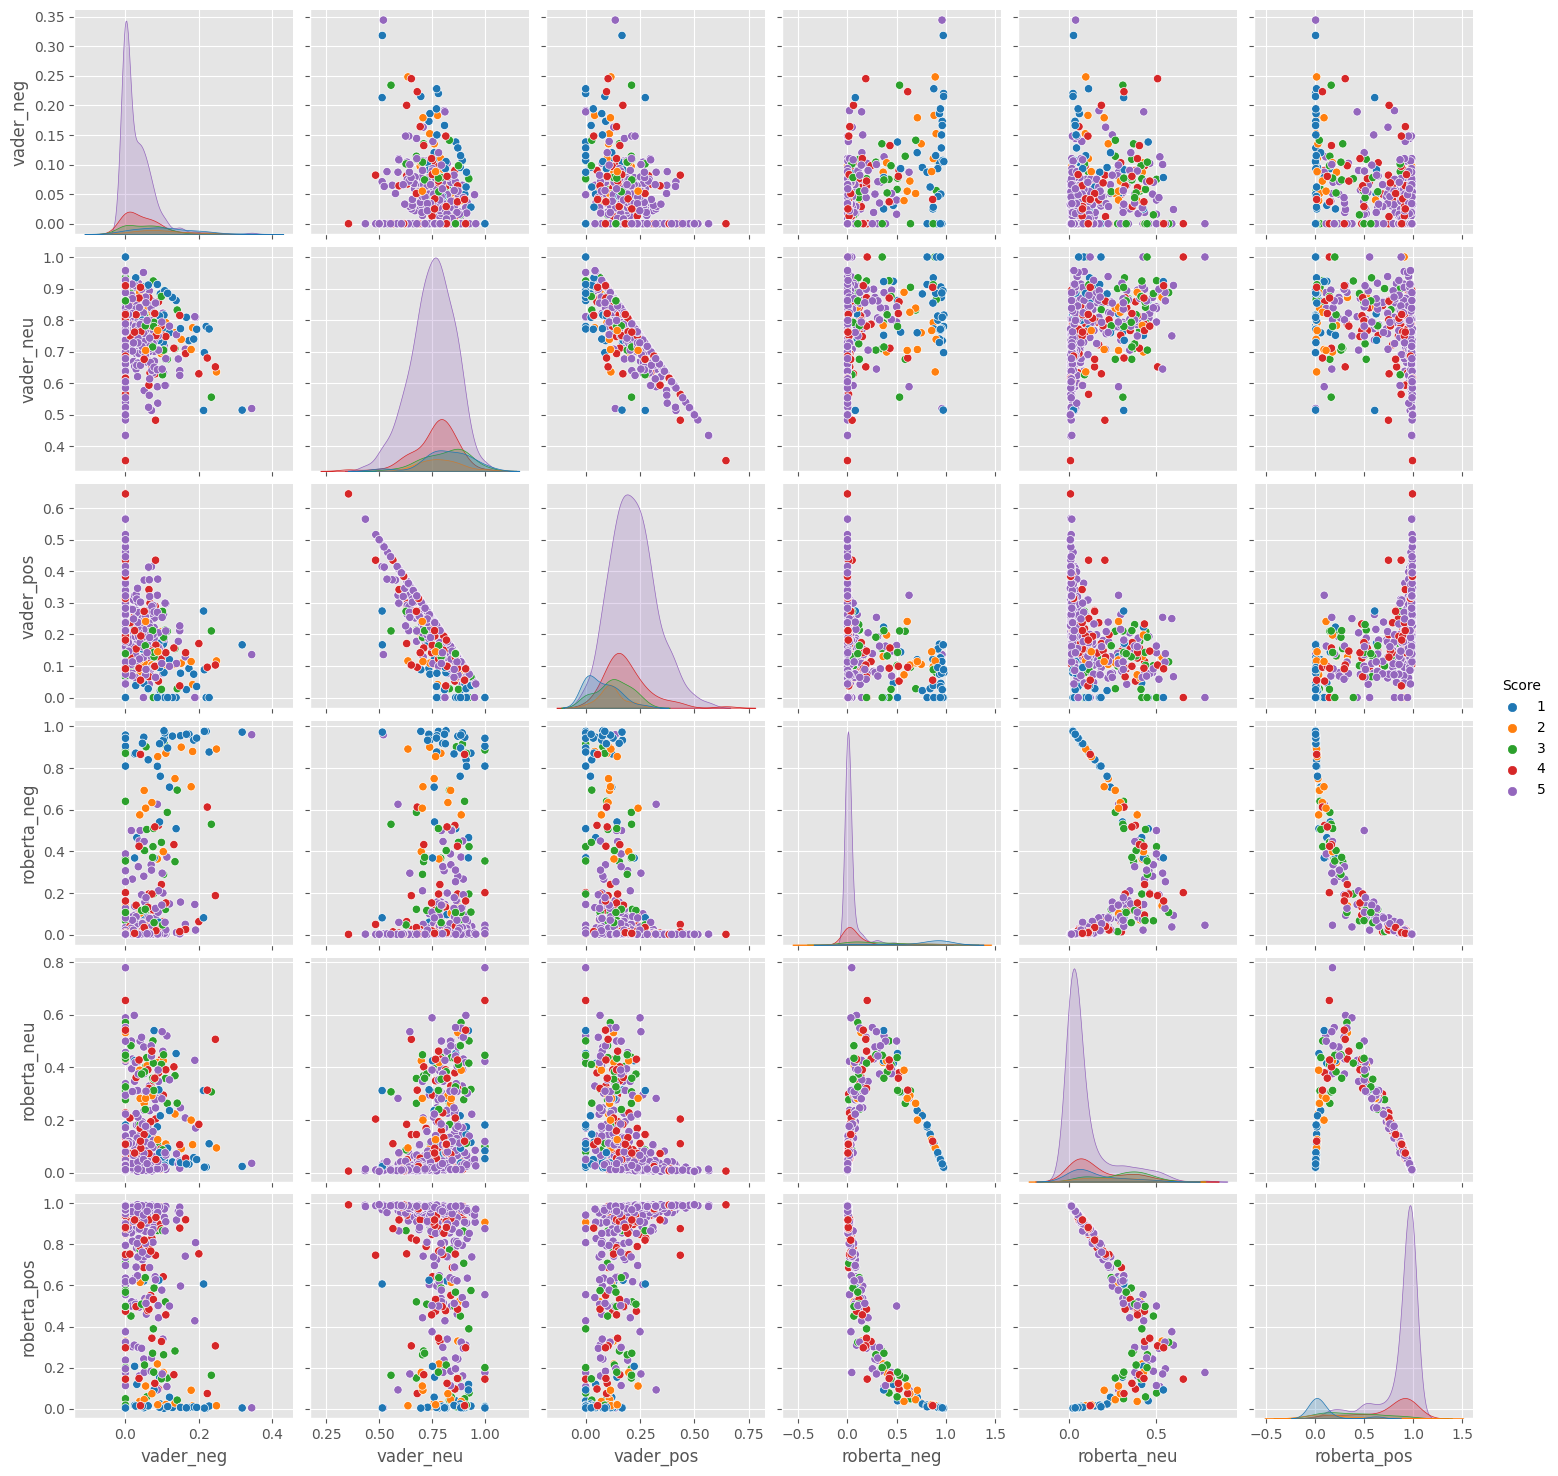

In [53]:
sns.pairplot(data=combined_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Score', palette='tab10')
plt.show()

## Review Examples

Positive 1-Star Reviews

Let's look at reviews where the model scoring and review score differ the most

In [54]:
combined_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [55]:
combined_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Negative 5-Star Reviews

In [56]:
combined_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [57]:
combined_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra: The Transformers Pipeline

Quick & Easy way to run sentiment predictions

In [58]:
from transformers import pipeline

In [59]:
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [60]:
sentiment_pipeline('I Love Sentiment Analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [61]:
sentiment_pipeline('I do not like your face')

[{'label': 'NEGATIVE', 'score': 0.9984040856361389}]

In [62]:
sentiment_pipeline('I am Eric')

[{'label': 'POSITIVE', 'score': 0.9991083741188049}]

Doesn't work good though